In [15]:
import os
from os import path
from pathlib import Path
import pandas as pd
import numpy as np
import re
import glob

In [16]:
with open(r'data\xss.txt', 'r', encoding="utf8") as file:
    data = file.read().replace('\n', '')

In [26]:
data
data1 = data

In [18]:
# data1.split('Jr')
raw = re.split(":|Jr. Olyvia|姗删不用谢。|\(|MF, Shanshan Xie|\)", data1)

In [19]:
df = pd.DataFrame({"block": np.arange(1, len(raw)+1), "txt": raw})
df.txt = df.txt.replace(['', ' '], np.nan)
df = df.dropna()
strings = df.txt.tolist()

In [20]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import jieba
from PIL import Image

In [21]:
res = []
for string in strings:
    string = string.strip()
    seg_list = jieba.cut(string)
    res+=list(seg_list)
#     print("Defualt Mode: " + '|'.join(list(seg_list)))

In [22]:
import stopwordsiso
from stopwordsiso import stopwords
all_stops = stopwords(['zh', 'en'])
all_stops
# mystops = ['Jr', 'Olyvia', 'UBC', 'Wen', 'Xie', '果丹皮','室', '火猪','天蓬']
# for w in mystops:
#     all_stops = all_stops.add(w)
res_nstp = [w for w in res if not w in all_stops]
res_nstp = [w for w in res_nstp if w != " "]
res_nstp;

In [35]:
# indicate the font path that can display Chinese
font_path = 'fonts/HanyiSentyBubbleTea.ttf'
d=os.getcwd()
d
mask = np.array(Image.open(path.join(d, 'imgs/lady.jpg')))
# mask
# create coloring from image
image_colors = ImageColorGenerator(mask)


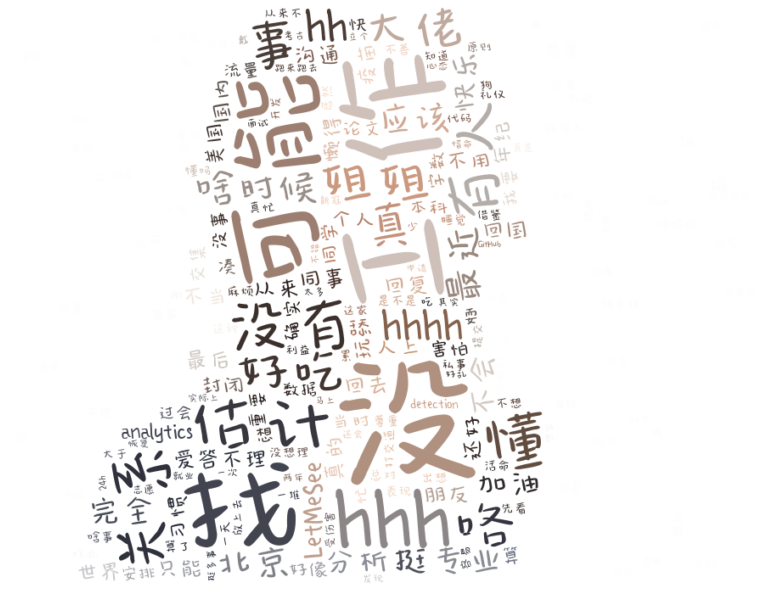

In [44]:
wc = WordCloud(font_path = font_path, mask=mask,
               background_color='white').generate(" ".join(res_nstp))

plt.figure(figsize=(15, 11))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()